In [59]:
import numpy as np
import math
import random
from matplotlib import pyplot
import matplotlib

In [83]:
A = 10 #параметр
N = 100

arr = [random.expovariate(1.0/A) for i in range(N)]

In [84]:
def est1(arr, n): #x1 = sum(Xi) / n
    res = 0
    for i in range(n):
        res += arr[i]
    res = res / n
    return res

In [85]:
def est2(arr, n): #x2 = (Xmin + Xmax)/(1/n + sum(1/k))
    min_el = arr[0]
    max_el = arr[0]
    sumk = 0
    for i in range(n):
        if min_el > arr[i]:
            min_el = arr[i]
        if max_el < arr[i]:
            max_el = arr[i]
        if i > 0 :
            sumk += 1/i
    return (min_el + max_el)/(1/n + sumk)

In [86]:
def est3(arr, n): #x3 = x(2)
    res = 0
    if(n >= 2):
        subArray = numpy.empty(n)
        for i in range(n):
            subArray[i] = arr[i]
        subArray.sort()
        res = subArray[1]
    else: res = arr[0]
    return res*n*(n-1)/(2*n - 1)

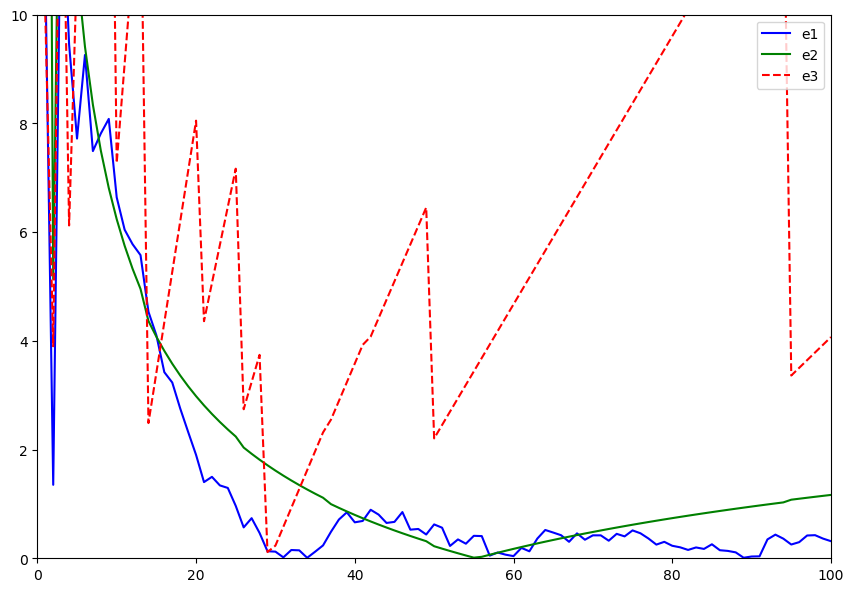

In [87]:
dpi = 100
fig = pyplot.figure(dpi = dpi, figsize = (1024 / dpi, 720 / dpi) )
matplotlib.rcParams.update({'font.size': 10})
pyplot.axis([0, N, 0, 10])

xs = numpy.linspace(1, N, N)
e1 = numpy.array([est1(arr, i + 1) for i in range(N)])
e2 = numpy.array([est2(arr, i + 1) for i in range(N)])
e3 = numpy.array([est3(arr, i + 1) for i in range(N)])

pyplot.plot(xs, abs(e1 - A), color = 'blue', linestyle = 'solid', label = 'e1')
pyplot.plot(xs, abs(e2 - A), color = 'green', linestyle = 'solid', label = 'e2')
pyplot.plot(xs, abs(e3 - A), color = 'red', linestyle = 'dashed', label = 'e3')
_ = pyplot.legend(loc = 'upper right')